In [1]:
# !pip install tensorflow-gpu
!pip install gdown

  Using cached gdown-4.7.1-py3-none-any.whl (15 kB)
  Using cached filelock-3.12.0-py3-none-any.whl (10 kB)
  Using cached tqdm-4.65.0-py3-none-any.whl (77 kB)


In [3]:
!pip install seaborn

     ---------------------------------------- 0.0/293.3 kB ? eta -:--:--
     ---- ---------------------------------- 30.7/293.3 kB 1.3 MB/s eta 0:00:01
     ------- ----------------------------- 61.4/293.3 kB 656.4 kB/s eta 0:00:01
     ------------------ ------------------- 143.4/293.3 kB 1.2 MB/s eta 0:00:01
     ----------------------------- -------- 225.3/293.3 kB 1.4 MB/s eta 0:00:01
     -------------------------------------- 293.3/293.3 kB 1.4 MB/s eta 0:00:00
     ---------------------------------------- 0.0/7.6 MB ? eta -:--:--
     ---------------------------------------- 0.1/7.6 MB 2.0 MB/s eta 0:00:04
     - -------------------------------------- 0.2/7.6 MB 2.4 MB/s eta 0:00:04
     - -------------------------------------- 0.2/7.6 MB 1.8 MB/s eta 0:00:05
     - -------------------------------------- 0.4/7.6 MB 2.0 MB/s eta 0:00:04
     -- ------------------------------------- 0.5/7.6 MB 2.0 MB/s eta 0:00:04
     -- ------------------------------------- 0.6/7.6 MB 2.0 MB/s 

In [4]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
import joblib

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 16, 10

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

In [5]:
!gdown --id 1aRXGcJlIkuC6uj1iLqzi9DQQS-3GPwM_ --output airbnb_nyc.csv

C:\Users\msi\anaconda3\envs\newpython310\lib\site-packages\gdown\cli.py:126: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1aRXGcJlIkuC6uj1iLqzi9DQQS-3GPwM_
To: C:\Users\msi\Desktop\TestProject\Deploy-Keras-Deep-Learning-Model-with-Flask\price_prediction\airbnb_nyc.csv

  0%|          | 0.00/7.08M [00:00<?, ?B/s]
  7%|7         | 524k/7.08M [00:00<00:04, 1.33MB/s]
 15%|#4        | 1.05M/7.08M [00:00<00:03, 1.52MB/s]
 22%|##2       | 1.57M/7.08M [00:00<00:03, 1.73MB/s]
 30%|##9       | 2.10M/7.08M [00:01<00:02, 1.96MB/s]
 37%|###7      | 2.62M/7.08M [00:01<00:02, 2.08MB/s]
 44%|####4     | 3.15M/7.08M [00:01<00:01, 2.24MB/s]
 52%|#####1    | 3.67M/7.08M [00:01<00:01, 2.31MB/s]
 59%|#####9    | 4.19M/7.08M [00:02<00:01, 2.34MB/s]
 67%|######6   | 4.72M/7.08M [00:02<00:00, 2.40MB/s]
 74%|#######4  | 5.24M/7.08M [00:02<00:00, 2.

In [6]:
df = pd.read_csv('airbnb_nyc.csv')

# Exploration

In [7]:
df.shape

(48895, 16)

In [8]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

C:\Users\msi\AppData\Local\Temp\ipykernel_13152\689887770.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.price);


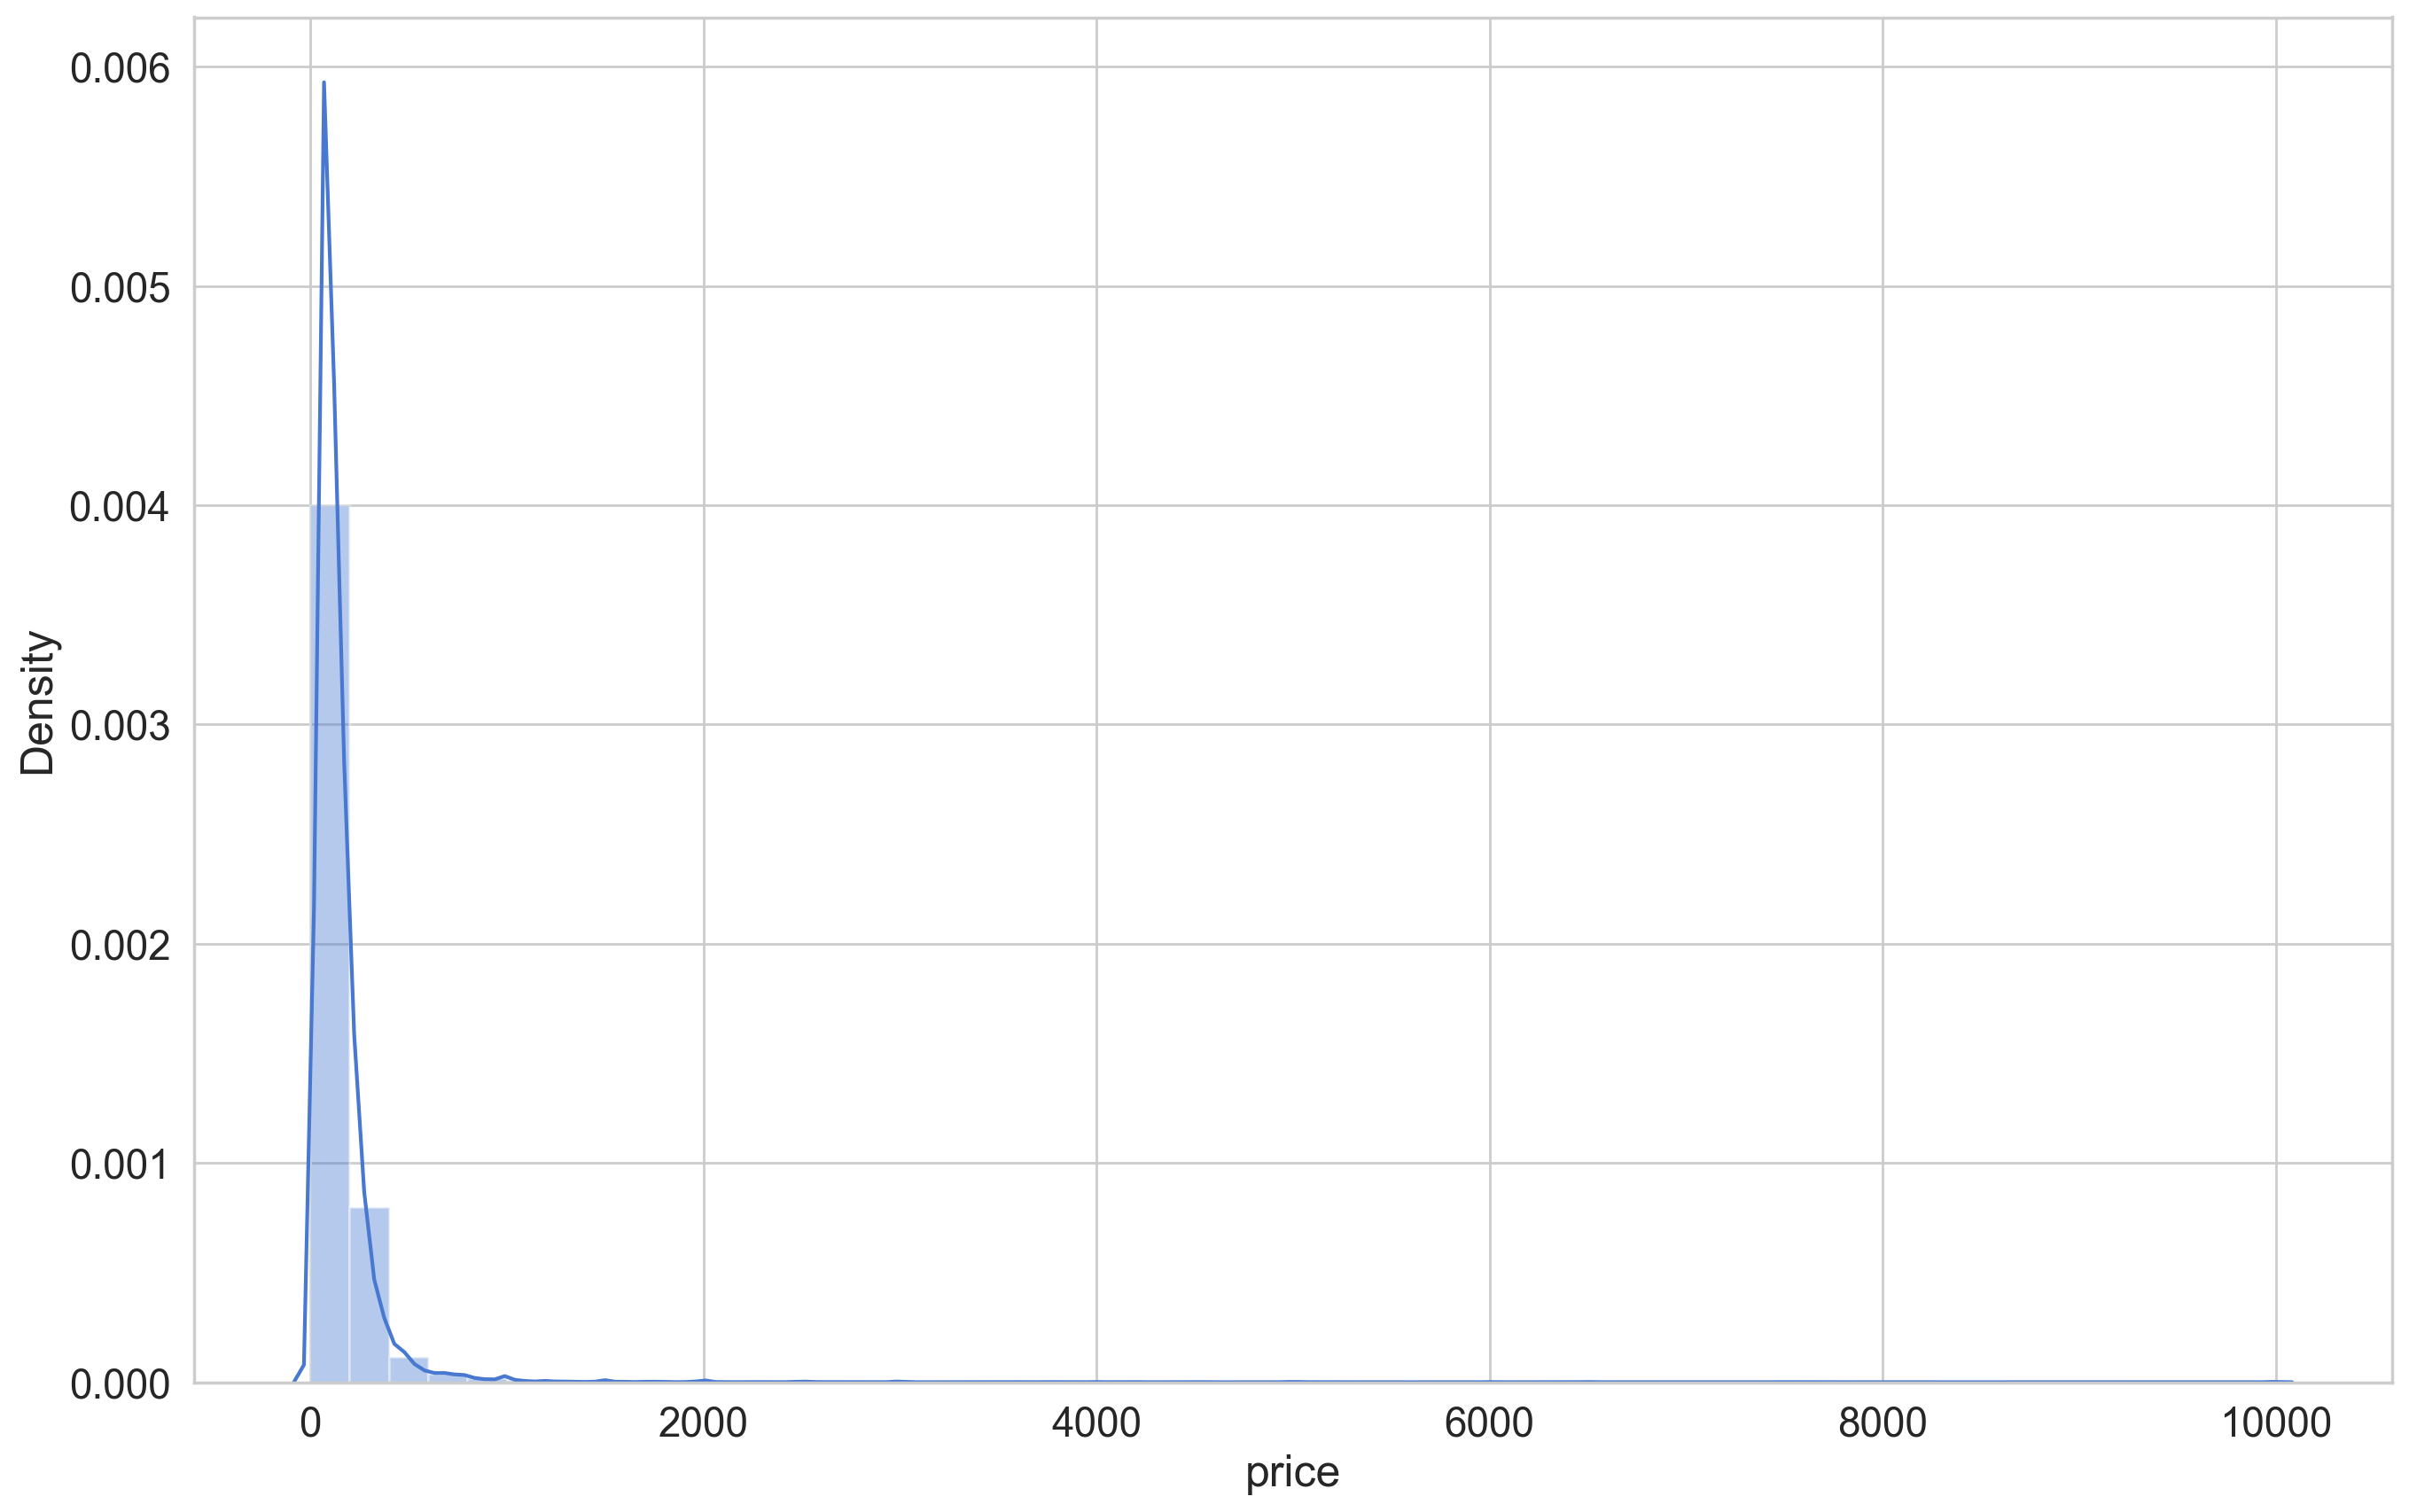

In [9]:
sns.distplot(df.price);

C:\Users\msi\AppData\Local\Temp\ipykernel_13152\4159789517.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log1p(df.price));


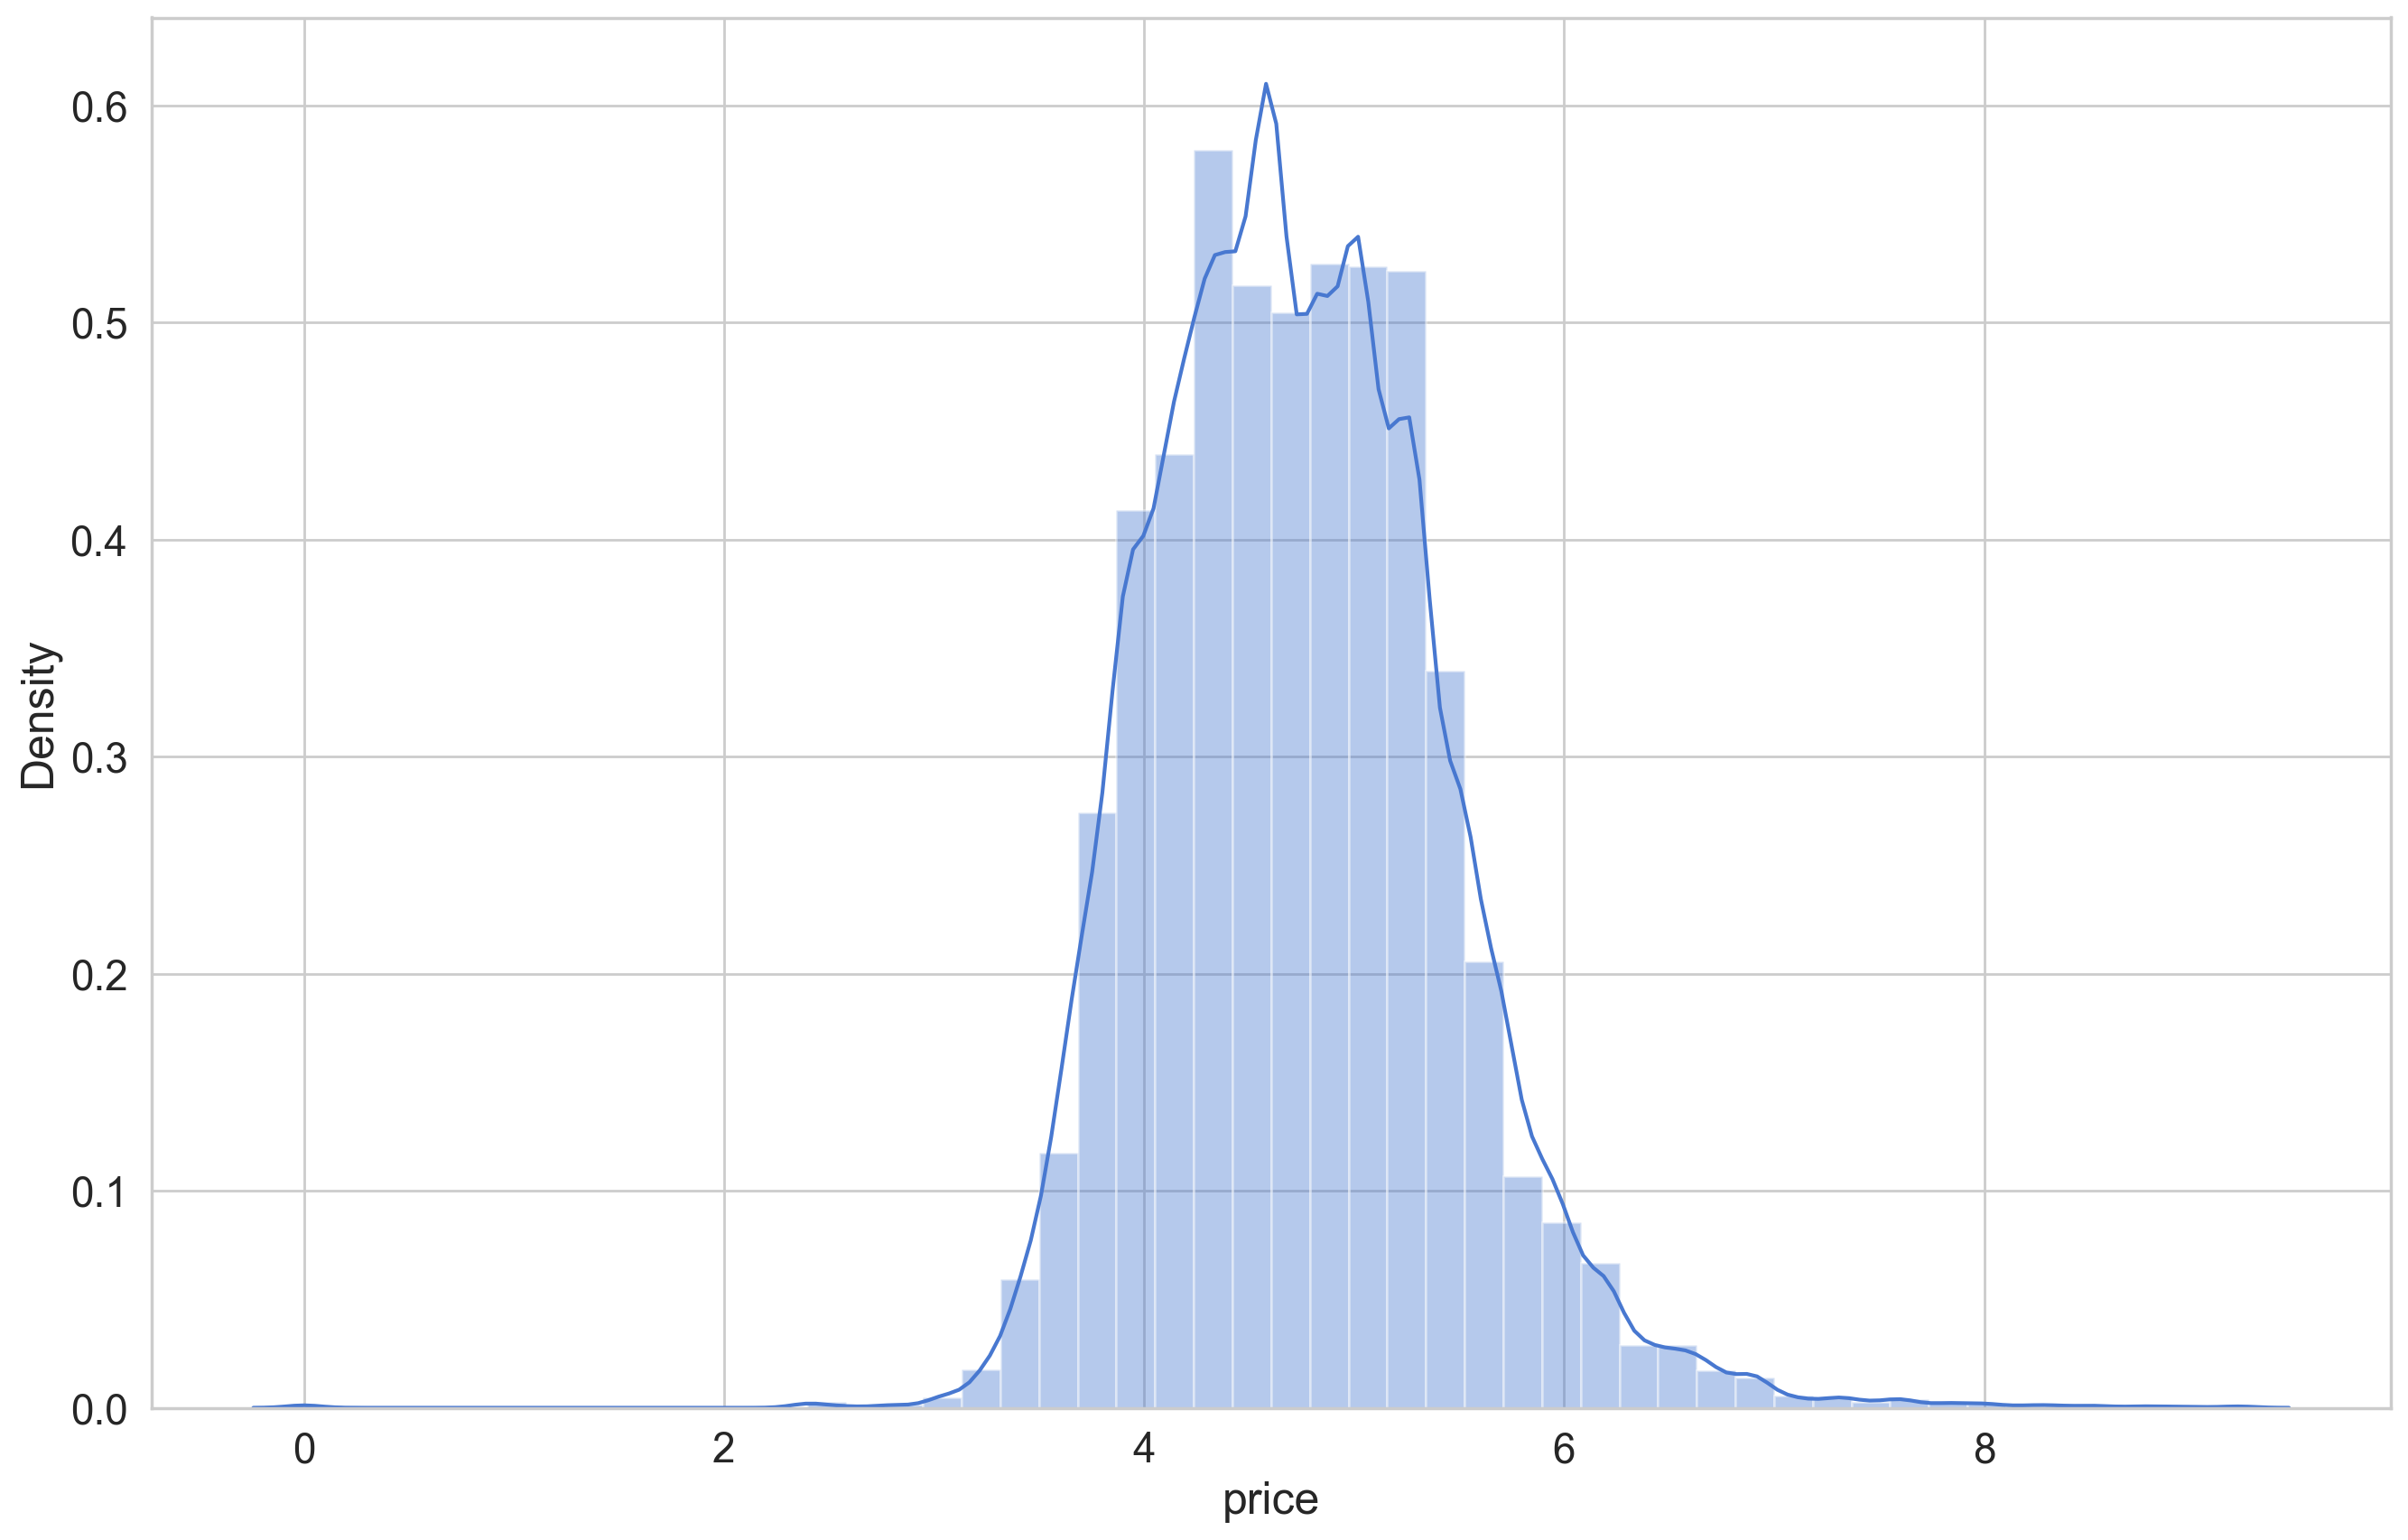

In [10]:
sns.distplot(np.log1p(df.price));

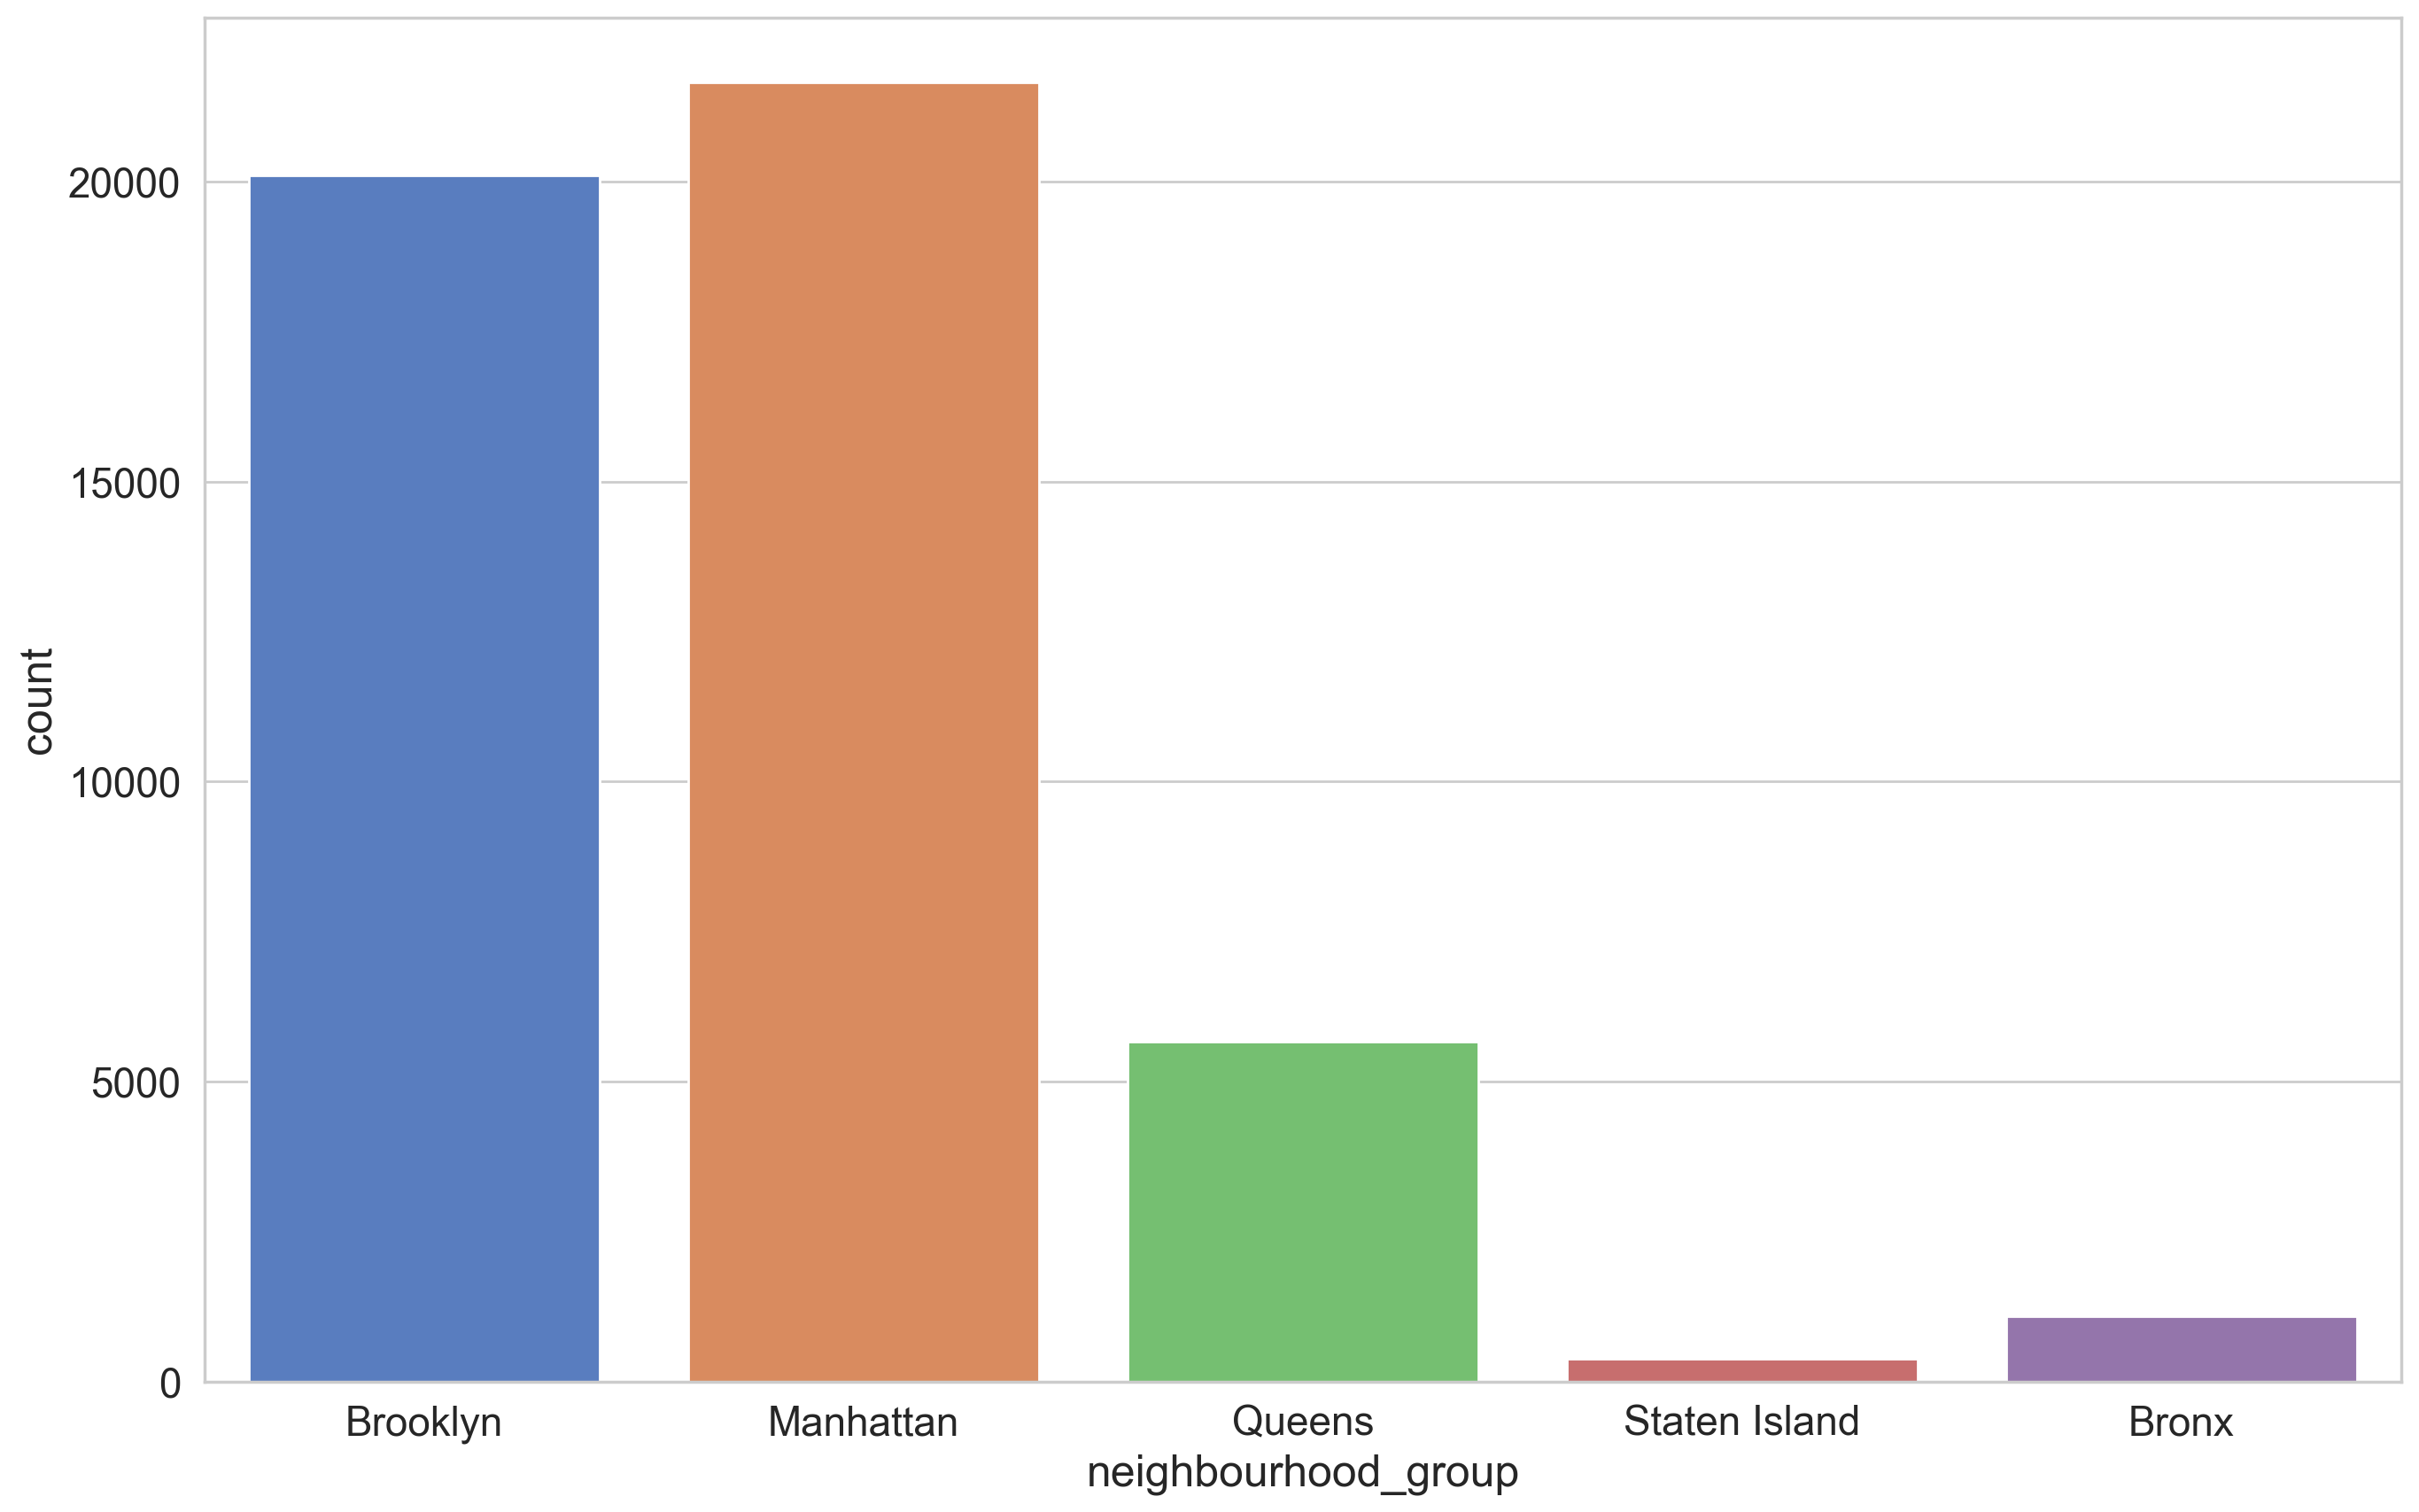

In [11]:
sns.countplot(x='neighbourhood_group', data=df);

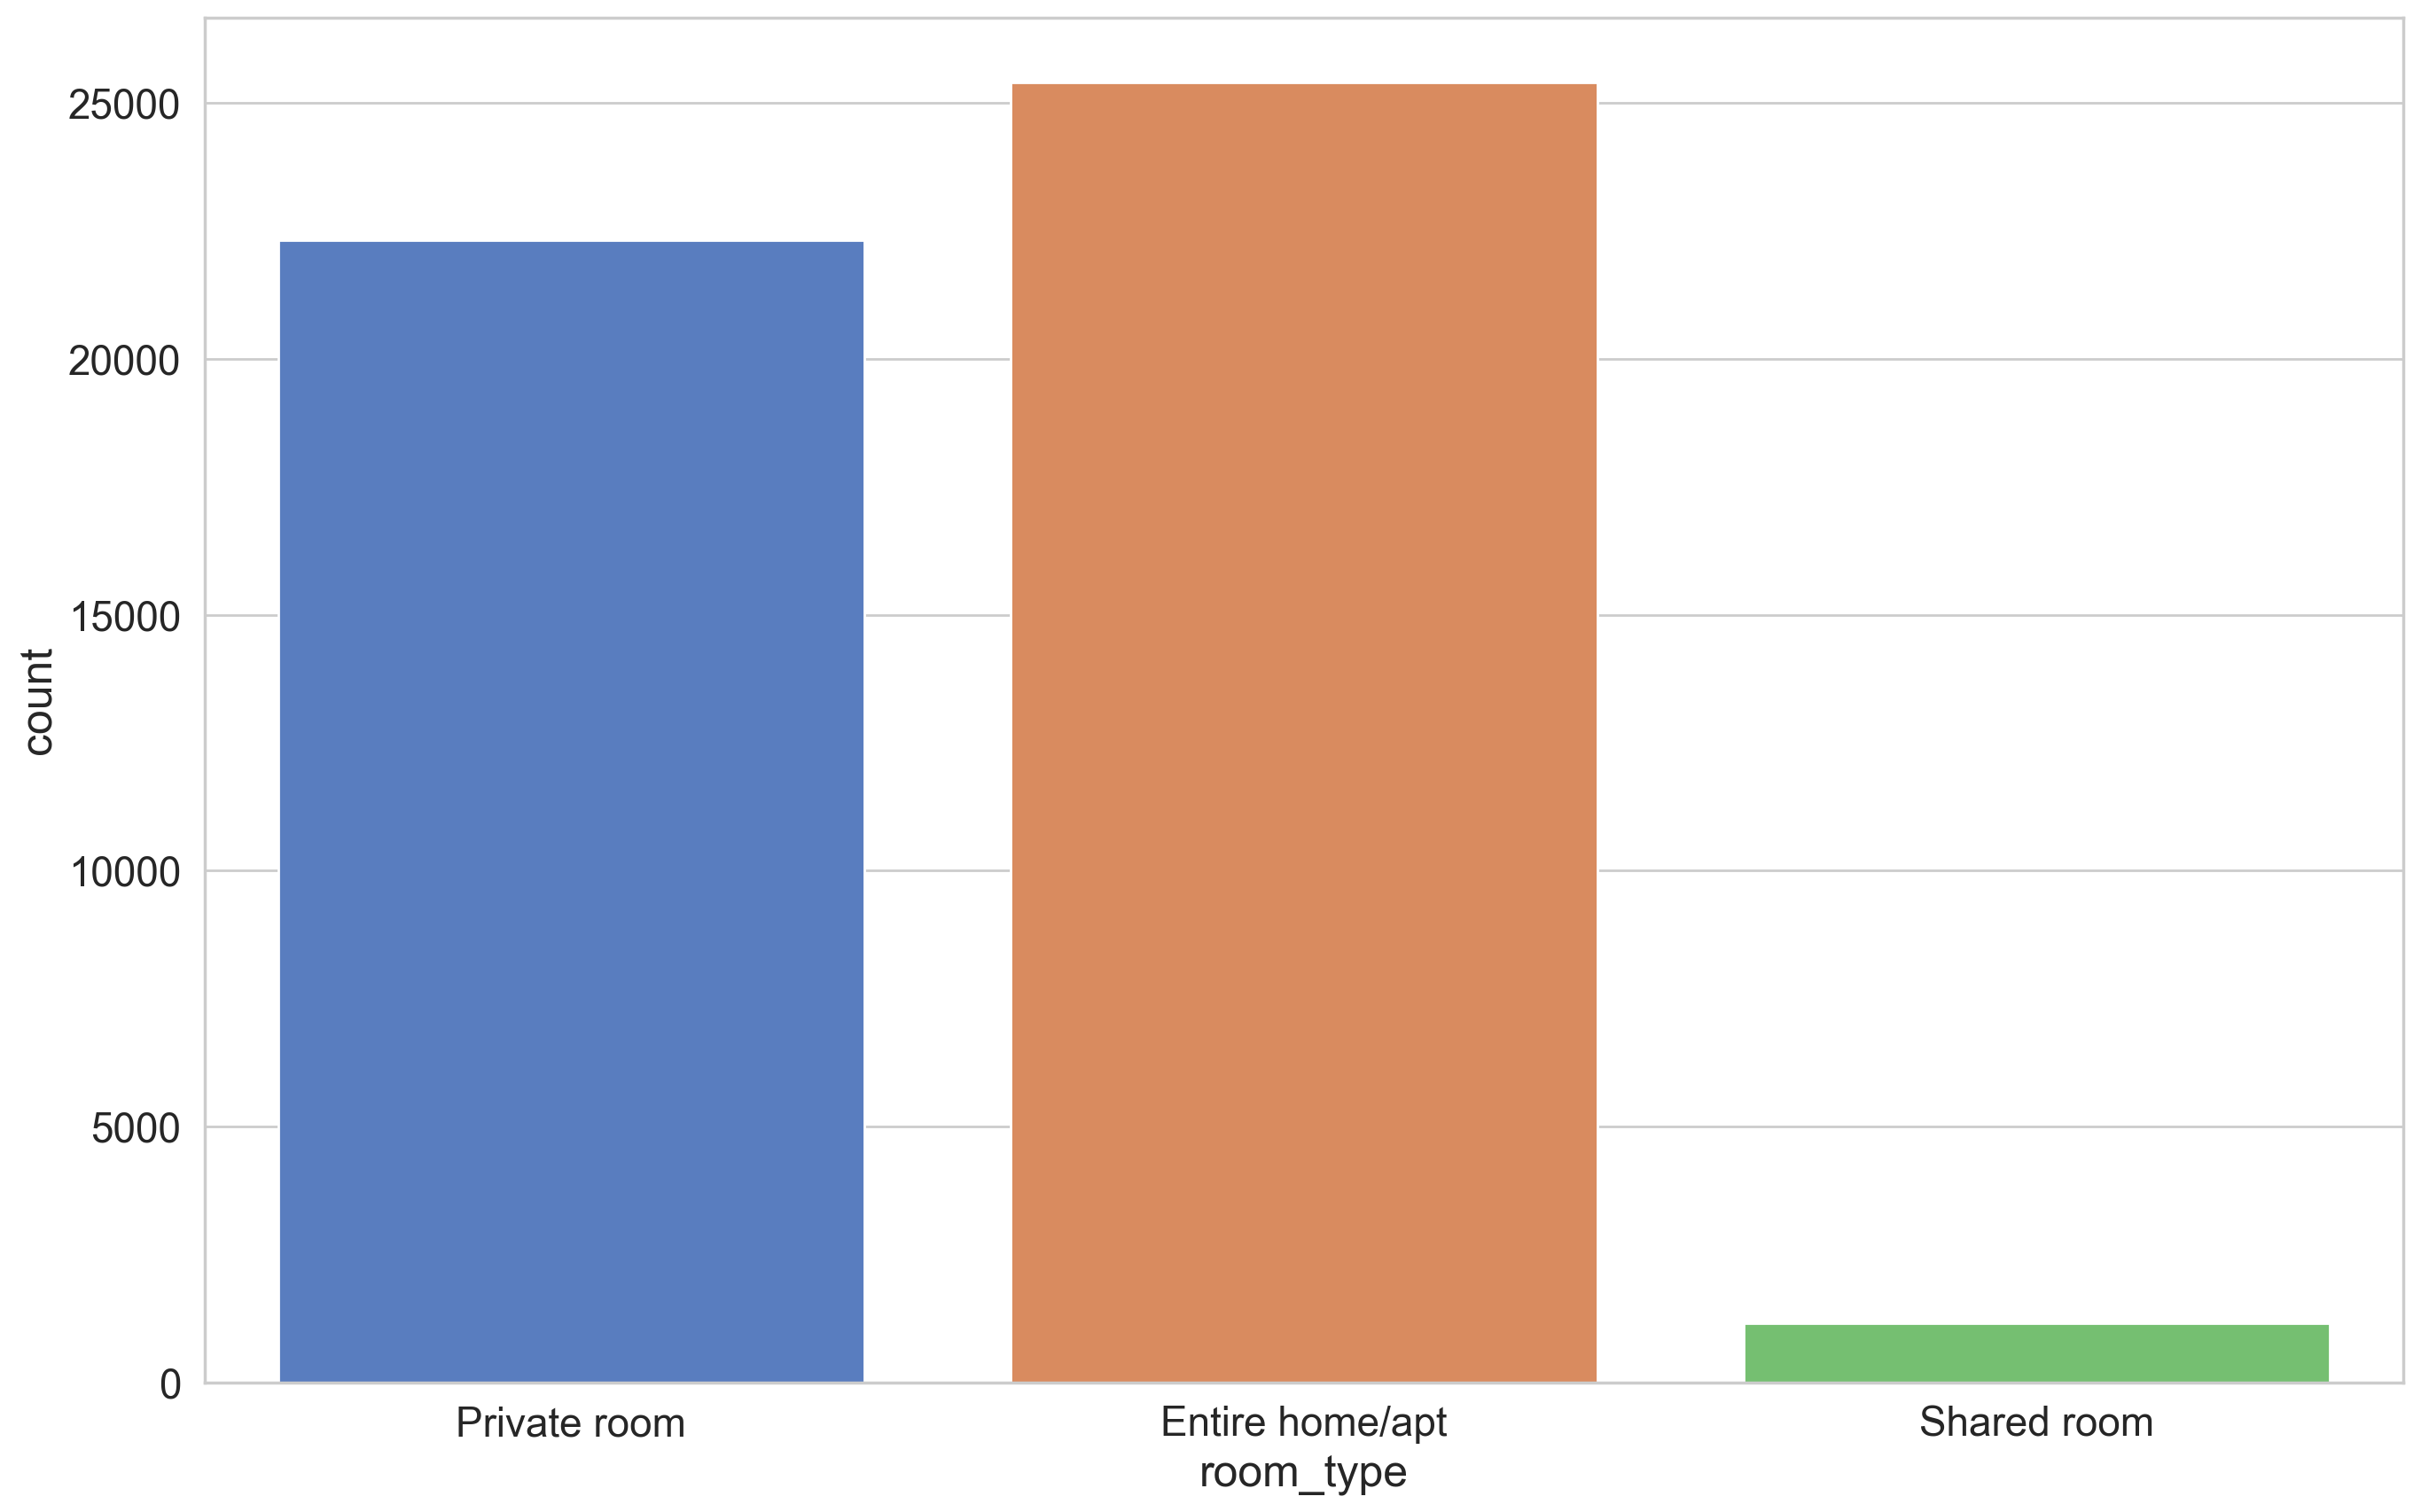

In [12]:
sns.countplot(x='room_type', data=df);

C:\Users\msi\AppData\Local\Temp\ipykernel_13152\1735526145.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.minimum_nights);


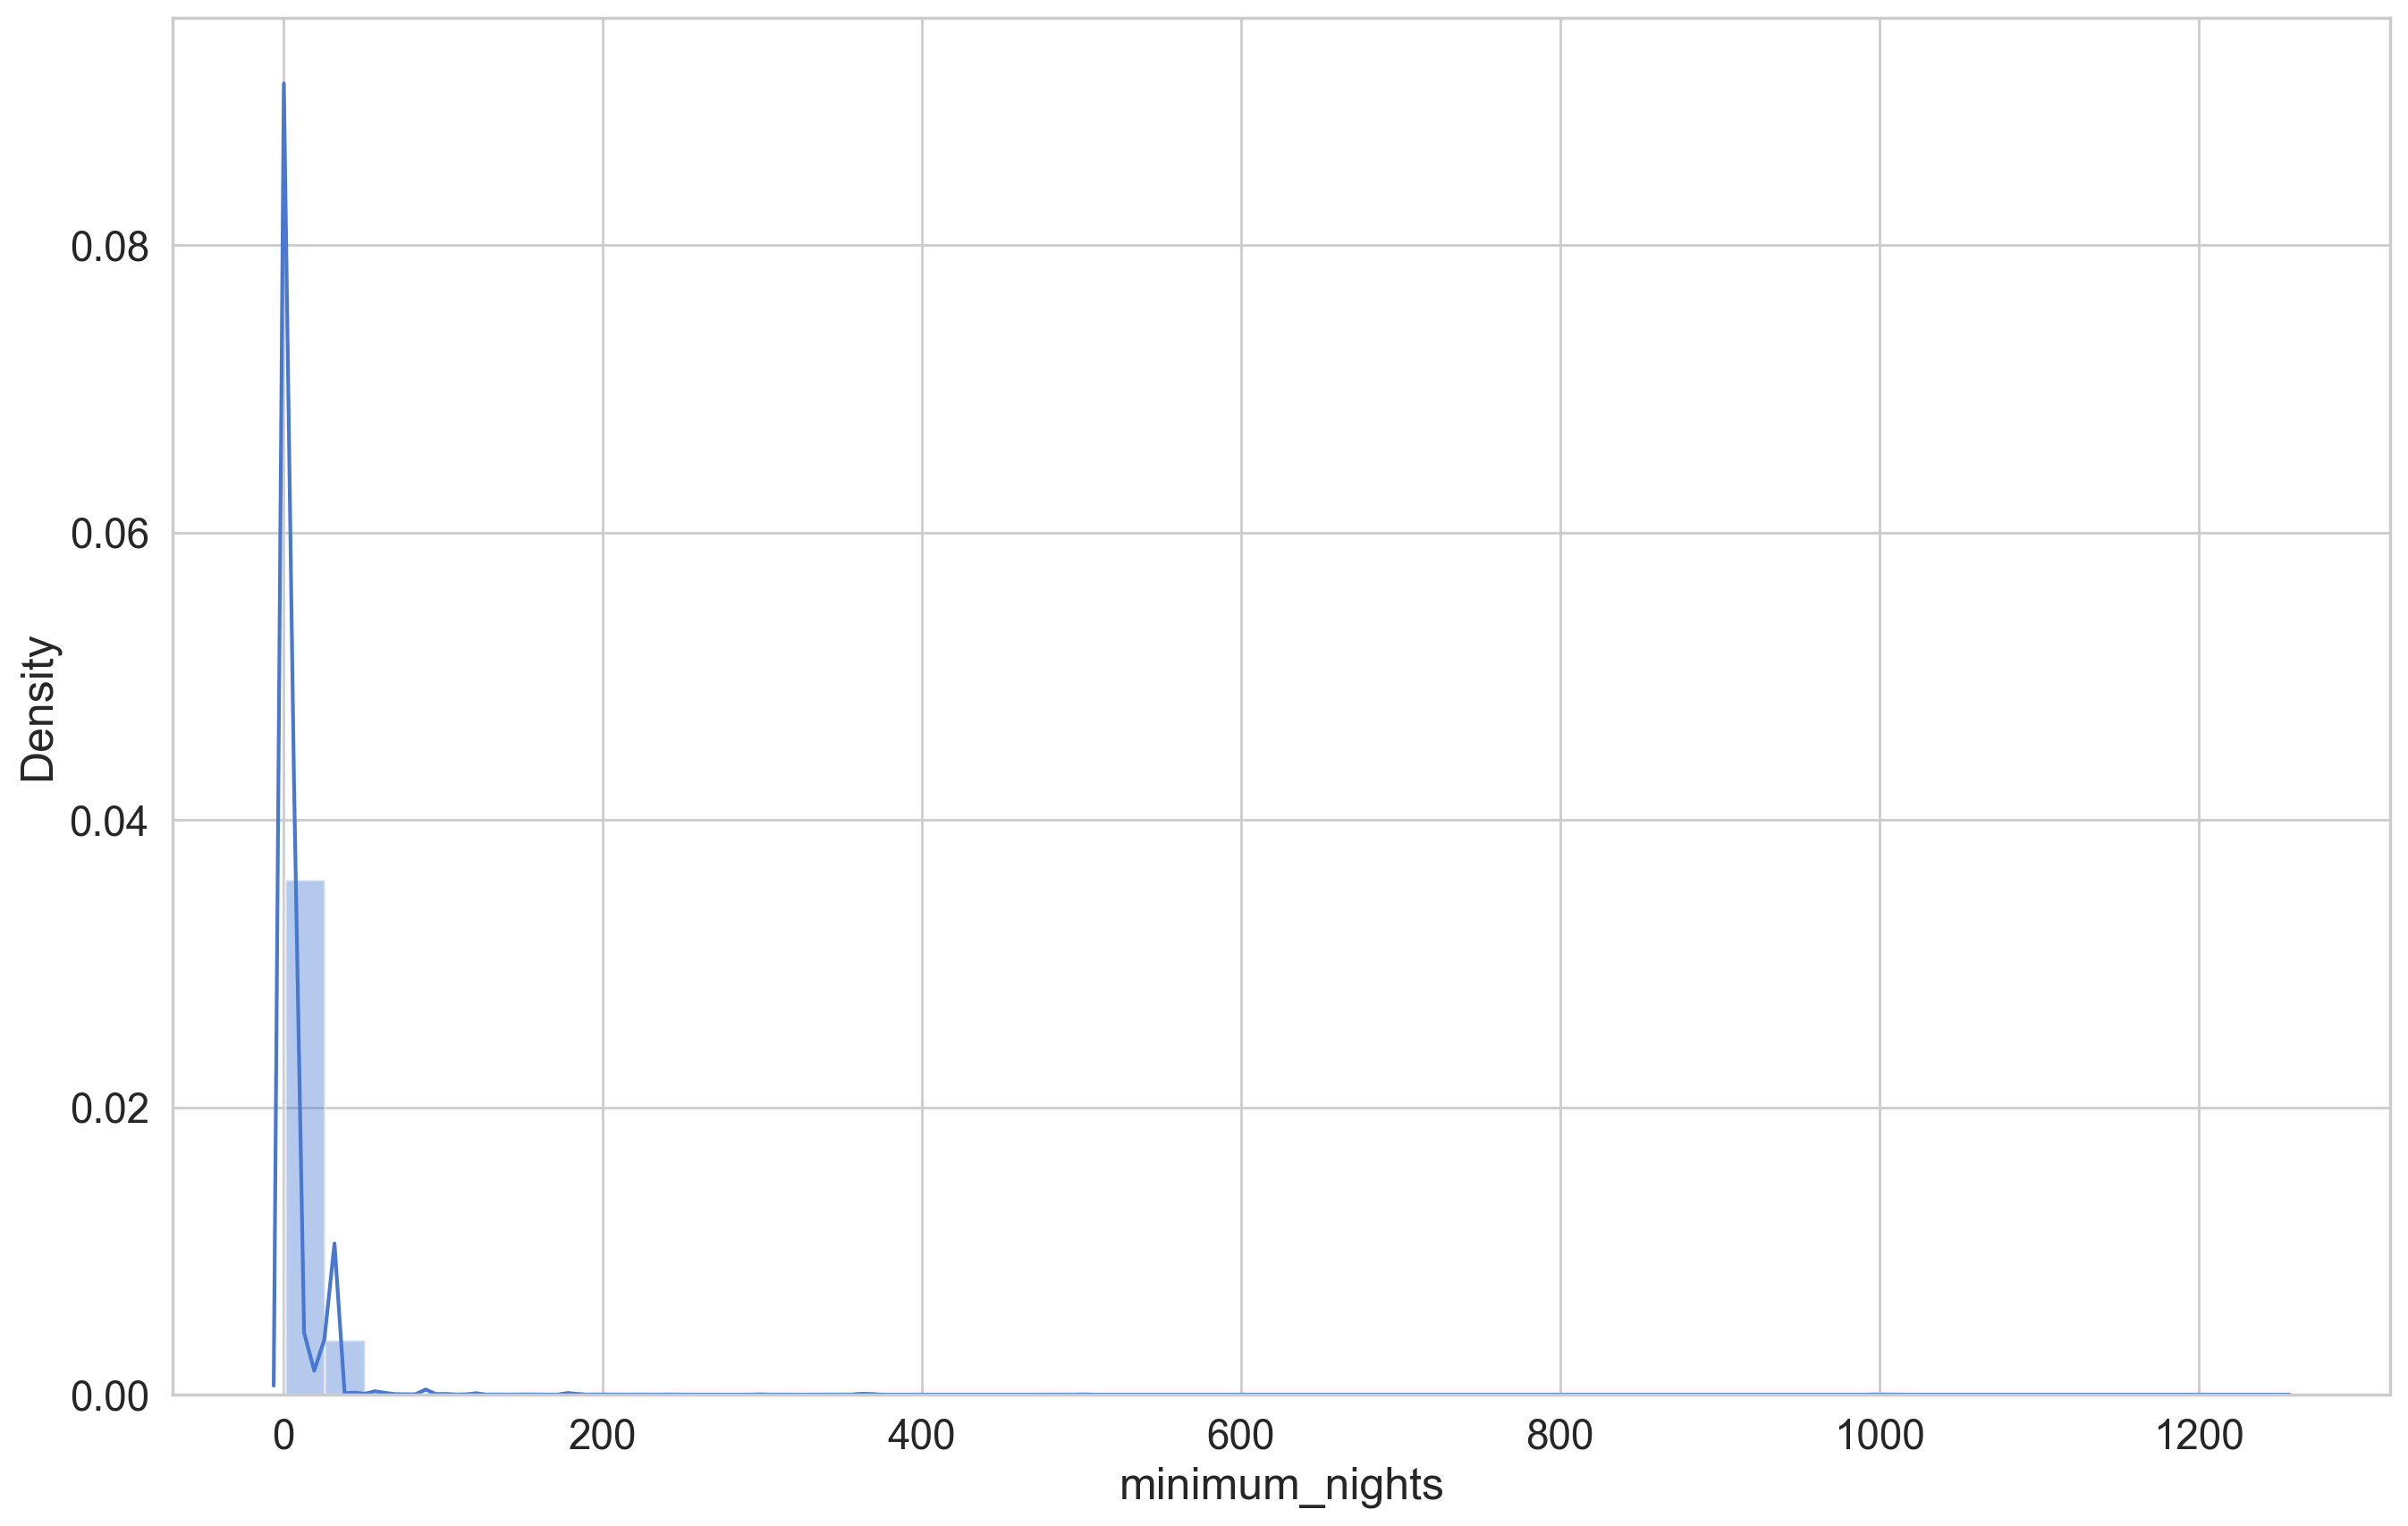

In [13]:
sns.distplot(df.minimum_nights);

C:\Users\msi\AppData\Local\Temp\ipykernel_13152\2185572018.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.number_of_reviews);


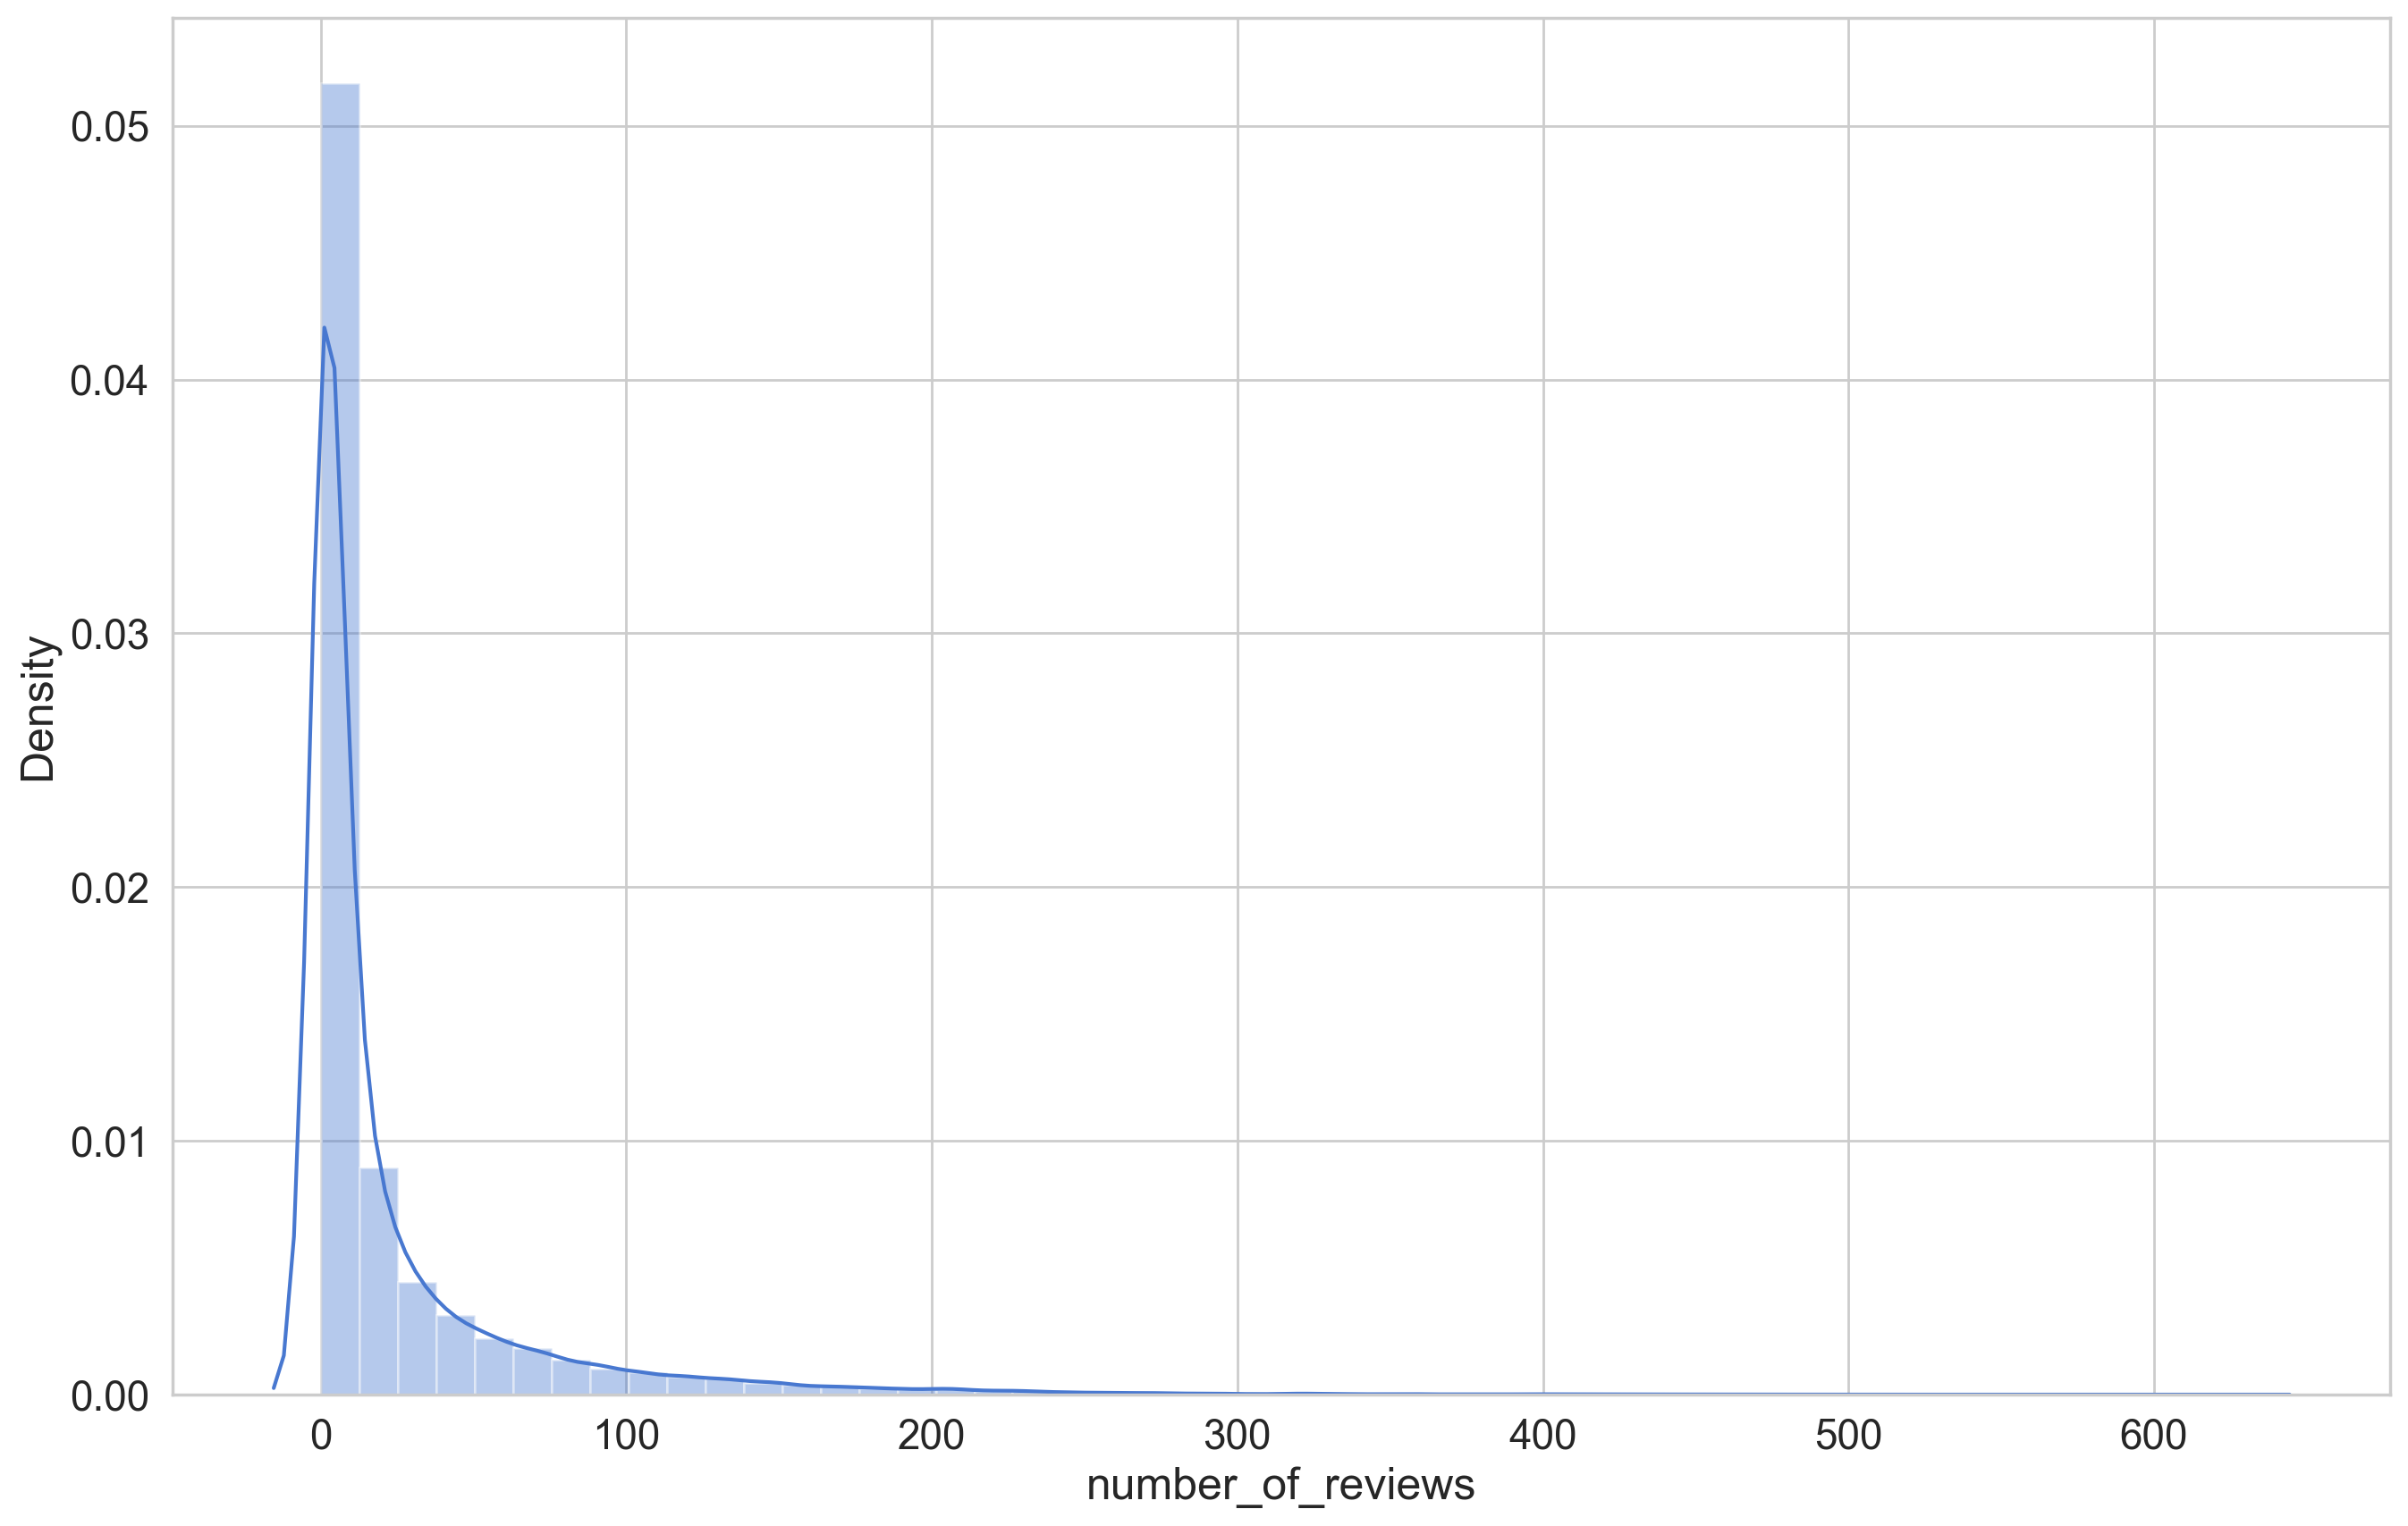

In [14]:
sns.distplot(df.number_of_reviews);

In [15]:
corr_matrix = df.corr()

ValueError: could not convert string to float: 'Clean & quiet apt home by the park'

In [ ]:
price_corr = corr_matrix['price']
price_corr.iloc[price_corr.abs().argsort()]

In [ ]:
palette = sns.diverging_palette(20, 220, n=256)
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap=palette, vmax=.3, center=0,
            square=True, linewidths=.5);

# Preprocessing




## Missing data?

In [ ]:
missing = df.isnull().sum()
missing[missing > 0].sort_values(ascending=False)

## Remove unused columns!


In [16]:
df = df.drop(['id', 'name', 'host_id', 'host_name', 'reviews_per_month', 'last_review', 'neighbourhood'], axis=1)

In [17]:
missing = df.isnull().sum()
missing[missing > 0].sort_values(ascending=False)

Series([], dtype: int64)

In [18]:
df.columns

Index(['neighbourhood_group', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [19]:
df.head()

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,Brooklyn,40.64749,-73.97237,Private room,149,1,9,6,365
1,Manhattan,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,Manhattan,40.80902,-73.94190,Private room,150,3,0,1,365
3,Brooklyn,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,Manhattan,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


## Predict log1p

In [20]:
X = df.drop('price', axis=1)
y = np.log1p(df.price.values)

## Feature scaling and One-hot encoding

In [21]:
from sklearn.preprocessing import OneHotEncoder

data = [['Manhattan'], ['Brooklyn']]

OneHotEncoder(sparse=False).fit_transform(data)

C:\Users\msi\anaconda3\envs\newpython310\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 1.],
       [1., 0.]])

In [22]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import make_column_transformer

transformer = make_column_transformer(
    (MinMaxScaler(), ['latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365']),
    (OneHotEncoder(handle_unknown="ignore"), ['neighbourhood_group', 'room_type'])
)

In [23]:
transformer.fit(X)

ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['latitude', 'longitude', 'minimum_nights',
                                  'number_of_reviews',
                                  'calculated_host_listings_count',
                                  'availability_365']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['neighbourhood_group', 'room_type'])])

In [24]:
X = transformer.transform(X)

## Split the training and test data

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [26]:
X_train.shape

(39116, 14)

# Modeling

In [27]:
def plot_mse(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('MSE')
  plt.plot(hist['epoch'], hist['mse'],
            label='Train MSE')
  plt.plot(hist['epoch'], hist['val_mse'],
            label = 'Val MSE')
  plt.legend()
  plt.show()

Epoch 1/100
978/978 [==============================] - 2s 1ms/step - loss: 7.8373 - mse: 7.8373 - val_loss: 0.5598 - val_mse: 0.5598
Epoch 2/100
978/978 [==============================] - 1s 1ms/step - loss: 2.3099 - mse: 2.3099 - val_loss: 0.4457 - val_mse: 0.4457
Epoch 3/100
978/978 [==============================] - 1s 1ms/step - loss: 2.0490 - mse: 2.0490 - val_loss: 0.4145 - val_mse: 0.4145
Epoch 4/100
978/978 [==============================] - 1s 1ms/step - loss: 1.8415 - mse: 1.8415 - val_loss: 0.4260 - val_mse: 0.4260
Epoch 5/100
978/978 [==============================] - 1s 1ms/step - loss: 1.7561 - mse: 1.7561 - val_loss: 0.4403 - val_mse: 0.4403
Epoch 6/100
978/978 [==============================] - 1s 1ms/step - loss: 1.6589 - mse: 1.6589 - val_loss: 0.3845 - val_mse: 0.3845
Epoch 7/100
978/978 [==============================] - 1s 1ms/step - loss: 1.6049 - mse: 1.6049 - val_loss: 0.4248 - val_mse: 0.4248
Epoch 8/100
978/978 [==============================] - 1s 1ms/step - 

978/978 [==============================] - 1s 1ms/step - loss: 0.3022 - mse: 0.3022 - val_loss: 0.2502 - val_mse: 0.2502
Epoch 63/100
978/978 [==============================] - 1s 1ms/step - loss: 0.2981 - mse: 0.2981 - val_loss: 0.2482 - val_mse: 0.2482
Epoch 64/100
978/978 [==============================] - 2s 2ms/step - loss: 0.2932 - mse: 0.2932 - val_loss: 0.2511 - val_mse: 0.2511
Epoch 65/100
978/978 [==============================] - 1s 1ms/step - loss: 0.2920 - mse: 0.2920 - val_loss: 0.2482 - val_mse: 0.2482
Epoch 66/100
978/978 [==============================] - 1s 1ms/step - loss: 0.2859 - mse: 0.2859 - val_loss: 0.2470 - val_mse: 0.2470
Epoch 67/100
978/978 [==============================] - 1s 1ms/step - loss: 0.2833 - mse: 0.2833 - val_loss: 0.2438 - val_mse: 0.2438
Epoch 68/100
978/978 [==============================] - 1s 1ms/step - loss: 0.2796 - mse: 0.2796 - val_loss: 0.2454 - val_mse: 0.2454
Epoch 69/100
978/978 [==============================] - 1s 1ms/step - loss:

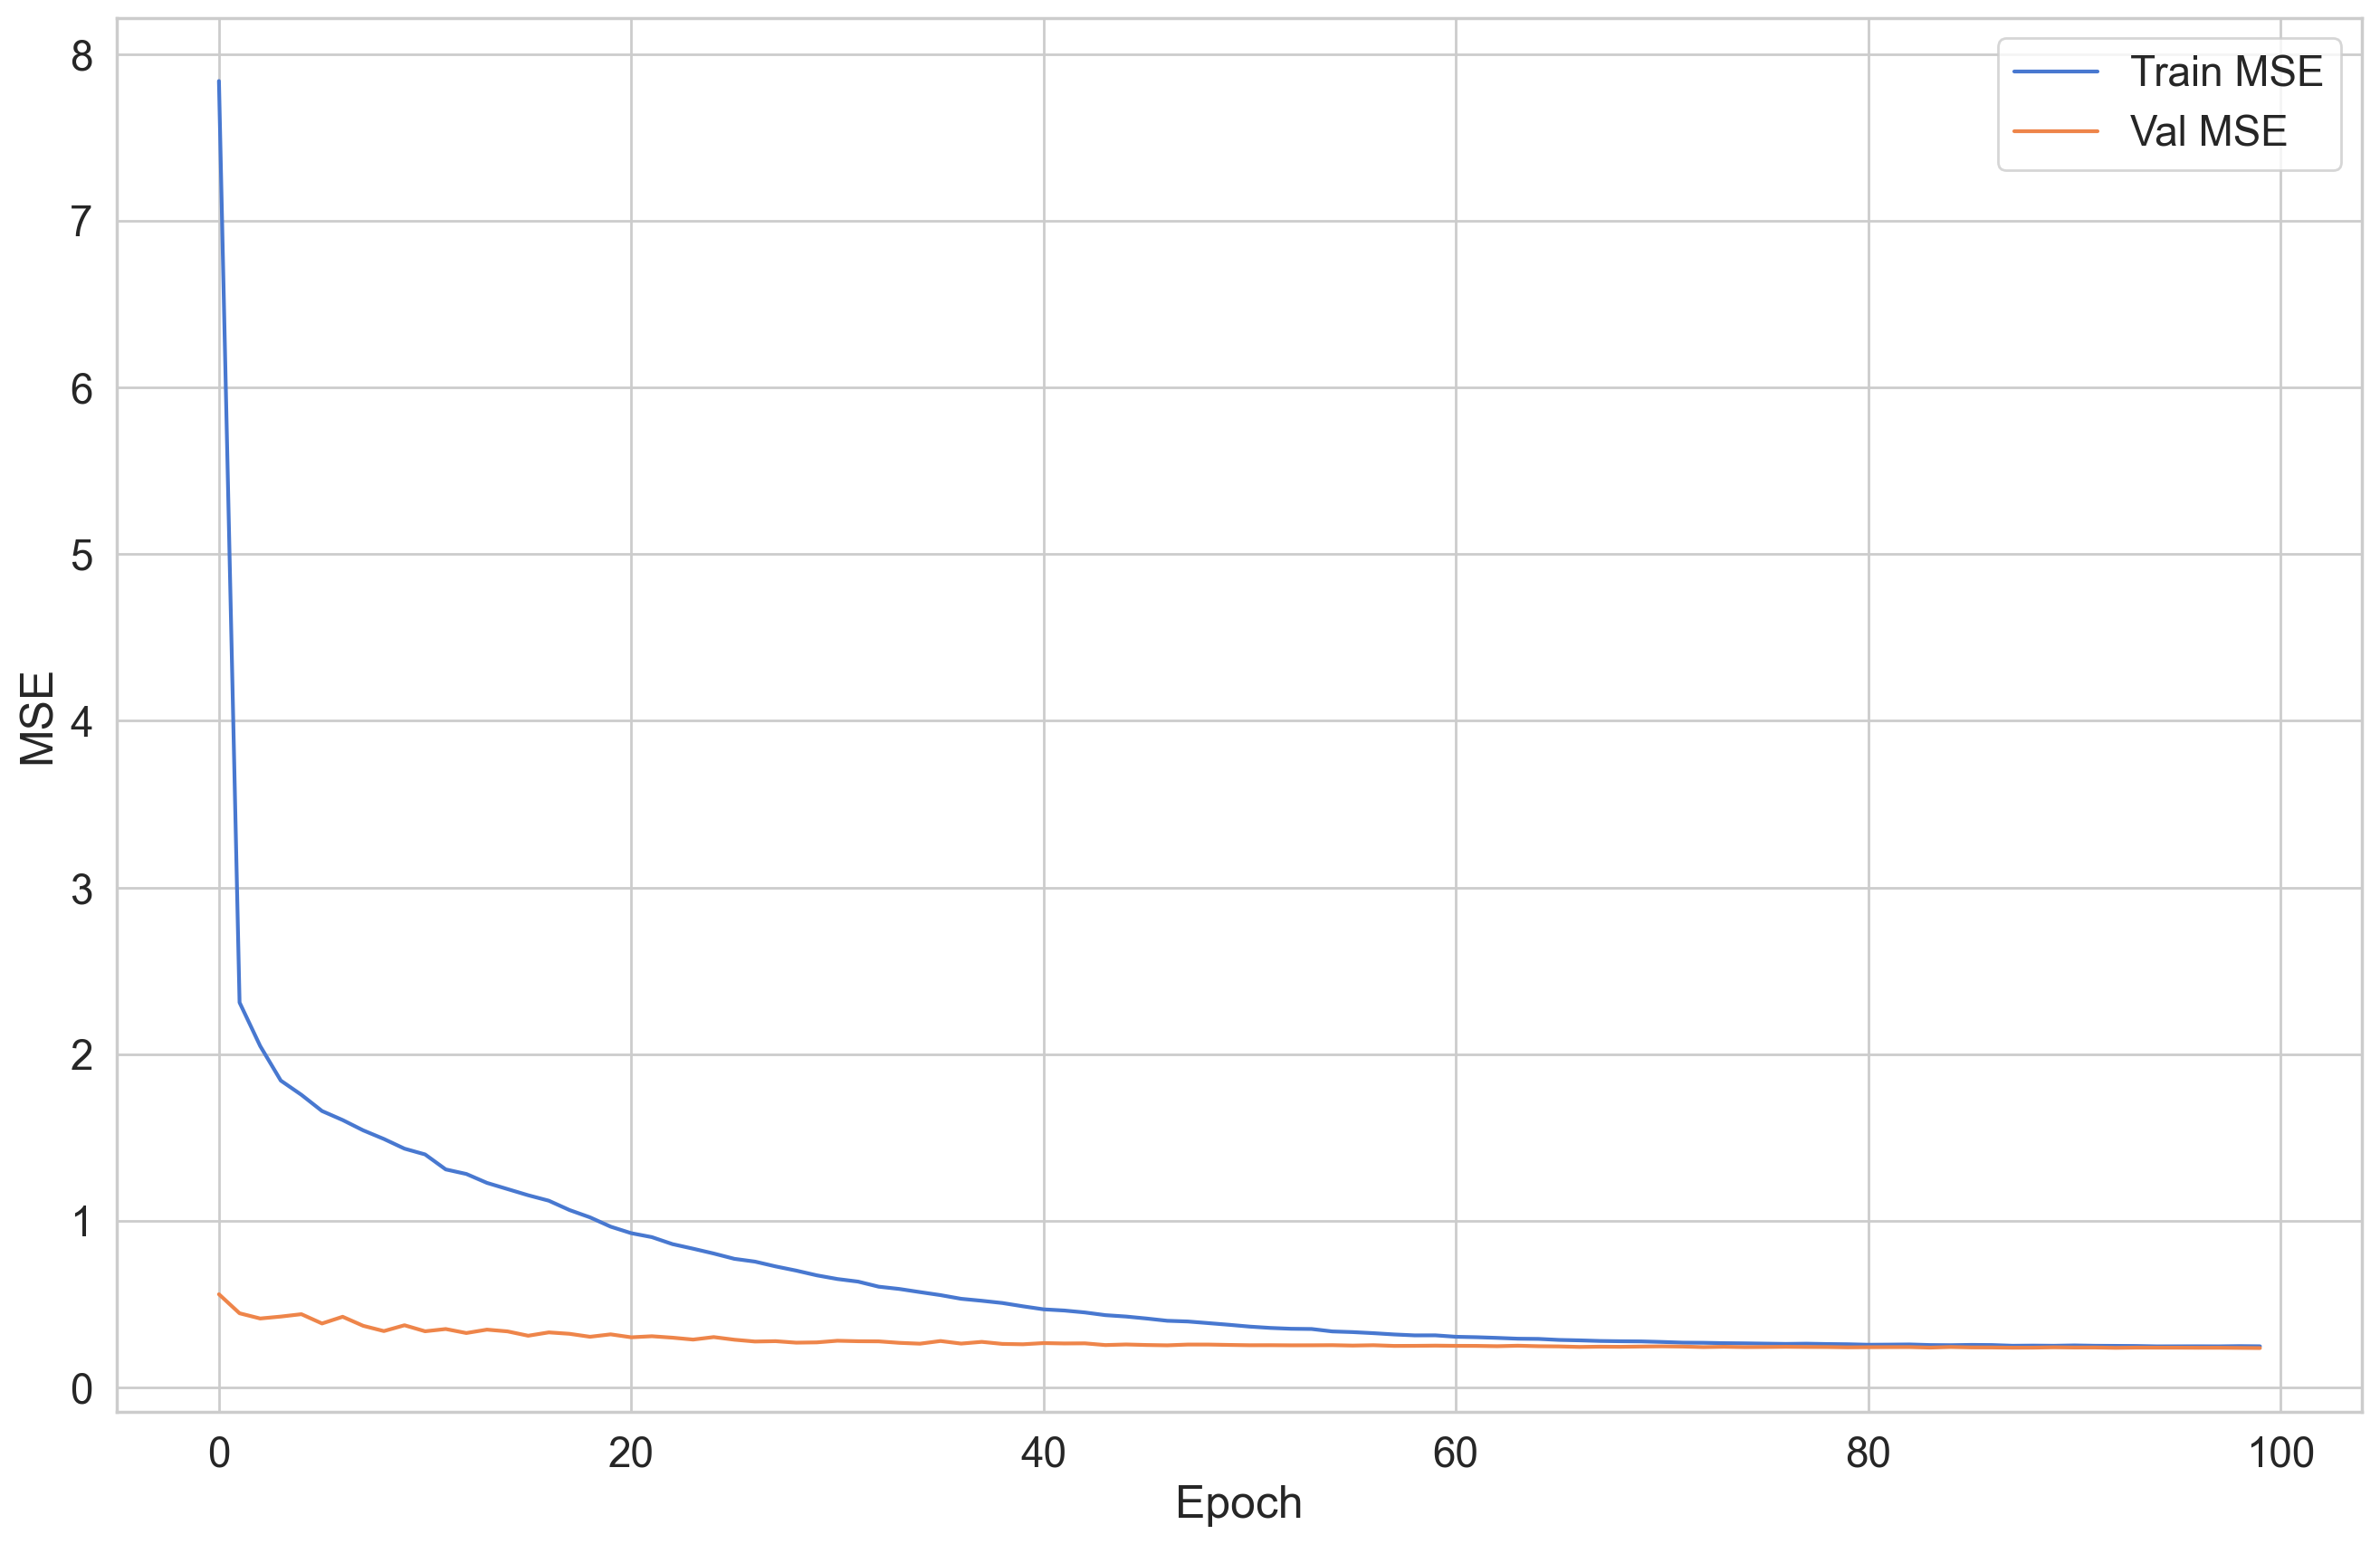

In [28]:
model = keras.Sequential()
model.add(keras.layers.Dense(units=64, activation="relu", input_shape=[X_train.shape[1]]))
model.add(keras.layers.Dropout(rate=0.3))
model.add(keras.layers.Dense(units=32, activation="relu"))
model.add(keras.layers.Dropout(rate=0.5))

model.add(keras.layers.Dense(1))

model.compile(
    optimizer=keras.optimizers.Adam(0.0001),
    loss = 'mse', 
    metrics = ['mse'])

BATCH_SIZE = 32

early_stop = keras.callbacks.EarlyStopping(
  monitor='val_mse',
  mode="min",
  patience=10
)

history = model.fit(
  x=X_train,
  y=y_train,
  shuffle=True,
  epochs=100,
  validation_split=0.2,
  batch_size=BATCH_SIZE,
  callbacks=[early_stop]
)

plot_mse(history)

# Evaluation

In [33]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.metrics import r2_score

In [34]:
y_pred = model.predict(X_test)

306/306 [==============================] - 0s 630us/step


In [35]:
f'MSE {mean_squared_error(y_test, y_pred)}'

'MSE 0.2134776764448783'

In [36]:
f'MAE {mean_absolute_error(y_test, y_pred)}'

'MAE 0.33435646438473005'

In [37]:
f'RMSE {np.sqrt(mean_squared_error(y_test, y_pred))}'

'RMSE 0.4620364449314343'

In [38]:
f'R2 {r2_score(y_test, y_pred)}'

'R2 0.5487566336864746'

# Saving

In [40]:
joblib.dump(transformer, "data_transformer3.joblib")
model.save("price_prediction_model3.h5")

In [ ]:
from google.colab import files

In [ ]:
files.download("data_transformer.joblib")
files.download("price_prediction_model.h5") 